##EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [ ]:
#Let's see which encoding we have to apply.
with open("new.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}


## About The Data Set
url: the url which fetches the data

id: the id of transaction

Lng: and Lat coordinates, using the BD09 protocol.

Cid: community id

tradeTime: the time of transaction

DOM: active days on market.

followers: the number of people follow the transaction.

totalPrice: the total price

price: the average price by square

square: the square of house

livingRoom: the number of living room

drawingRoom: the number of drawing room

kitchen: the number of kitchen

bathroom the number of bathroom

floor: the height of the house.

buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).

constructionTime: the time of construction

renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )

buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).

ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.

elevator: elevator have ( 1 ) or not have elevator( 0 )

fiveYearsProperty: if the owner have the property for less than 5 years,

In [ ]:
#so,we have to apply GB2312 encoding.
data=pd.read_csv("new.csv",encoding="GB2312")

In [ ]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [ ]:
data.shape

(318851, 26)

In [ ]:
df0=data.copy()

In [ ]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [ ]:
data.isnull().sum()

,0
url,0
id,0
Lng,0
Lat,0
Cid,0
tradeTime,0
DOM,157977
followers,0
totalPrice,0
price,0


"DOM" Have almost 50% missing data.so, we can remove that columns.

buildingType  --->Missing Value ---->2021

elevator----->Missing Value --->32

fiveYearsProperty ---->Missing Value --->32

Subway --->Missing Value ---->32

communityAverage --->Missing Value --->32

<Axes: >

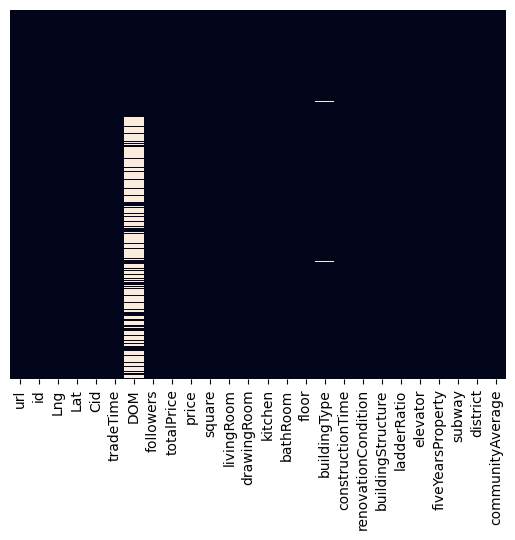

In [ ]:
#Let's Visualize the missing value
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

It's Clearly visible DOM have almost half value are missing and building type also have some missing value. so,for DOM columns it's better to drop.

In [ ]:
#Drop 'DOM' Columns
data.drop(columns=['DOM'],axis=1,inplace=True)

In [ ]:
data.shape

(318851, 25)

In [ ]:
data.isnull().sum()

,0
url,0
id,0
Lng,0
Lat,0
Cid,0
tradeTime,0
followers,0
totalPrice,0
price,0
square,0


We are not Replacing Our missing Data with Median Value

In [ ]:
data['buildingType'].fillna(data.buildingType.mode(),inplace=True)

In [ ]:
data.livingRoom.unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8, '1', '4', '3', '2', '5', '7', '9',
       '6', '0', '#NAME?', '8'], dtype=object)

In [ ]:
data.floor.unique()
#so,floor have a chinese character...

array(['高 26', '高 22', '中 4', '底 21', '中 6', '中 8', '高 6', '高 10', '中 23',
       '底 11', '底 3', '高 24', '低 23', '中 19', '高 18', '低 25', '中 12',
       '中 14', '中 30', '中 27', '中 5', '低 18', '底 28', '中 11', '低 9',
       '顶 7', '顶 27', '低 6', '中 17', '顶 6', '中 24', '中 15', '底 5', '中 29',
       '顶 19', '顶 5', '中 9', '低 22', '顶 18', '低 16', '高 13', '高 9',
       '高 17', '底 6', '中 28', '低 26', '底 15', '高 16', '底 2', '低 7',
       '中 13', '低 33', '底 14', '高 15', '底 4', '顶 11', '中 32', '顶 16',
       '底 18', '顶 17', '低 14', '低 10', '底 20', '高 12', '低 31', '低 30',
       '低 19', '低 12', '中 10', '中 16', '顶 20', '底 19', '中 31', '低 13',
       '底 10', '高 25', '中 21', '中 20', '高 20', '低 21', '低 24', '顶 4',
       '高 21', '高 7', '中 22', '底 1', '中 7', '底 8', '顶 15', '中 18', '高 28',
       '顶 14', '顶 13', '低 20', '底 26', '低 17', '顶 24', '底 23', '顶 3',
       '顶 21', '底 24', '高 30', '高 11', '底 25', '高 27', '底 9', '低 11',
       '低 28', '低 15', '顶 26', '低 34', '顶 12', '中 25', '高 8', '底 17',
       '

In [ ]:
data.bathRoom.unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 2006, 2003, 1990, 2000, 1996, 2005, 2011,
       '1', '2', '0', '3', '4', '5', '未知', 1994, 2004, '2003', '7'],
      dtype=object)

In [ ]:
data.drawingRoom.unique()

array([1, 2, 0, 4, 3, 5, '0', '1', '2', '3', '4', '中 14', '中 15', '中 16',
       '中 6', '高 14', '顶 6', '低 6', '低 16', '高 12', '低 15', '5', '高 6',
       '底 28', '底 11', '中 24', '底 20', '中 22'], dtype=object)

In [ ]:
# Define the Chinese characters and their English translations
translation_dict = {
    '低': 'Low',
    '中': 'Middle',
    '顶': 'Top',
    '高': 'High',
    '底': 'Base',
    '未知': 'Unknown',
    '钢混结构': 'Steel-Concrete Structure',
    '混合结构': 'Mixed Structure'
}

# Function to replace Chinese characters with English equivalents
def replace_chinese(text):
    if isinstance(text, str):
        for chinese, english in translation_dict.items():
            text = text.replace(chinese, english)
    return text

# List of columns to apply the replacement function to
columns_to_replace = ['floor', 'bathRoom', 'drawingRoom']

# Loop through the columns and apply the replacement function
for column in columns_to_replace:
    if column in data.columns:
        data[column] = data[column].apply(replace_chinese)
        # Print unique and non-unique values for each column
        floor_counts = data[column].value_counts()
        unique_values = floor_counts[floor_counts == 1].index.tolist()
        non_unique_values = floor_counts[floor_counts > 1].index.tolist()
        print(f"Unique {column} Values:", unique_values)
        print(f"Non-Unique {column} Values:", non_unique_values)
    else:
        print(f"The '{column}' column is not found in the dataset.")

# Display the updated DataFrame
print(data)

Unique floor Values: ['Low 63', 'Low 35', 'Low 2', 'Low 5']
Non-Unique floor Values: ['Middle 6', 'Top 6', 'High 6', 'Low 6', 'Base 6', 'Middle 5', 'Middle 18', 'High 18', 'Low 18', 'Middle 16', 'Middle 7', 'Middle 24', 'Middle 11', 'Low 16', 'Middle 20', 'High 24', 'High 16', 'Middle 14', 'Low 24', 'Middle 22', 'Middle 12', 'Middle 21', 'Top 5', 'Middle 26', 'Middle 28', 'Low 21', 'Middle 15', 'Low 22', 'Low 20', 'High 21', 'High 22', 'Middle 9', 'High 20', 'Middle 10', 'High 12', 'Middle 17', 'Middle 25', 'Low 12', 'High 28', 'Low 28', 'Base 5', 'Low 15', 'High 15', 'Low 26', 'Low 14', 'High 14', 'Middle 19', 'High 25', 'High 26', 'High 11', 'Middle 13', 'Low 25', 'Low 11', 'High 7', 'Middle 27', 'Low 9', 'Middle 4', 'High 9', 'High 27', 'Middle 23', 'Low 27', 'Low 7', 'High 19', 'Low 17', 'Base 7', 'Top 18', 'Middle 8', 'High 10', 'Low 19', 'High 17', 'Low 10', 'High 13', 'Middle 32', 'Base 18', 'High 23', 'Low 13', 'Top 16', 'Middle 30', 'Low 23', 'Top 11', 'Top 9', 'Top 4', 'Low 3

In [ ]:
def Trade_Time(x):
    return x[0:4]
data['tradeTime']=data['tradeTime'].apply(Trade_Time)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,2,1,1,1,High 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,2,2,1,2,High 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,3,2,1,3,Middle 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,3,1,1,1,Base 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,2,1,1,1,Middle 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


### Handling these Column in right Data Type

In [ ]:
#convert tradetime into int numeric
data['tradeTime'] = pd.to_numeric(data['tradeTime'])
data['livingRoom'] = data['livingRoom'].apply(pd.to_numeric, errors='coerce')
data['drawingRoom'] = data['drawingRoom'].apply(pd.to_numeric, errors='coerce')
data['bathRoom'] = data['bathRoom'].apply(pd.to_numeric, errors='coerce')
#convert ConstructionTime into int numeric
data['constructionTime'] = data['constructionTime'].apply(pd.to_numeric, errors='coerce')

we,can't apply this method for floor columns Because all the value are not numeric.

In [ ]:
#now if we check livingRoom Column it is clean data.
data.livingRoom.unique()

array([ 2.,  3.,  1.,  4.,  5.,  6.,  9.,  0.,  7.,  8., nan])

#### Handling  Floor Columns

In [ ]:
#Now,Split the column into a Floor_Type and Floor_Height
def Floor_Type(x):
    return x.split(' ')[0]

def Floor_Height(y):
    try:
        return int(y.split(' ')[1])
    except:
        return np.nan

data['floor_type']=data['floor'].apply(Floor_Type)
data['floor_height']=data['floor'].apply(Floor_Height)

In [ ]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage',
       'floor_type', 'floor_height'],
      dtype='object')

### Let's Drop unnecessary columns
As for the price column, we drop it because price is just totalPrice/square, which are the features already in the dataset

In [ ]:
data=data.drop(columns=['floor','url','id','Cid','price'])
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_type,floor_height
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,High,26.0
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,High,22.0
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,Middle,4.0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,Base,21.0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,Middle,6.0


### Now Let's Handle Categorical Data
1> renovationCondition

2> buildingStructure

3> buildingType

4> district

5> elevator

6> floor_type

In [ ]:
#Let's Perform one hot encoding
print(data.buildingType.unique())
print(data.renovationCondition.unique())
print(data.buildingStructure.unique())
#so,for buildingType we have a data like 0.5   0.333 0.125 0.25  0.429 0.048 0.375 0.667
# Which is unnecessary so,we have to remove them

[1.    4.    3.      nan 2.    0.5   0.333 0.125 0.25  0.429 0.048 0.375
 0.667]
[3 4 1 2 0]
[6 2 4 1 5 3 0]


In [ ]:
#Removing unnecessary data which is present in buildingType
data=data[data['buildingType']>=1]

In [ ]:
print(data.buildingType.unique())
print(data.shape)

[1. 4. 3. 2.]
(316798, 22)


In [ ]:
#let's take a copy of our data for future use
df=data.copy()

In [ ]:
col_for_dummies=['renovationCondition','buildingStructure','buildingType',
                 'district','elevator','floor_type']
data=pd.get_dummies(data=data,columns=col_for_dummies,drop_first=True)

In [ ]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_High,floor_type_Low,floor_type_Middle,floor_type_Top,floor_type_Unknown
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,2005.0,0.217,0.0,1.0,56021.0,26.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,2004.0,0.667,1.0,0.0,71539.0,22.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,2005.0,0.500,0.0,0.0,48160.0,4.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,2008.0,0.273,0.0,0.0,51238.0,21.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,1960.0,0.333,1.0,1.0,62588.0,6.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
print(data.shape)
print(df0.shape)

(316798, 45)
(318851, 26)


In [ ]:
data=data.dropna(axis=0)

In [ ]:
print(data.shape)

(297701, 45)


In [ ]:
data.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0', 'floor_type_High',
       'floor_type_Low', 'floor_type_Middle', 'floor_type_Top',
       'floor_type_Unknown'],
      dtype='object')

## EDA  

In [ ]:
df1=data[['Lng','Lat','tradeTime','totalPrice','followers','followers','livingRoom','drawingRoom','kitchen',
    'bathRoom','square','communityAverage','ladderRatio']]

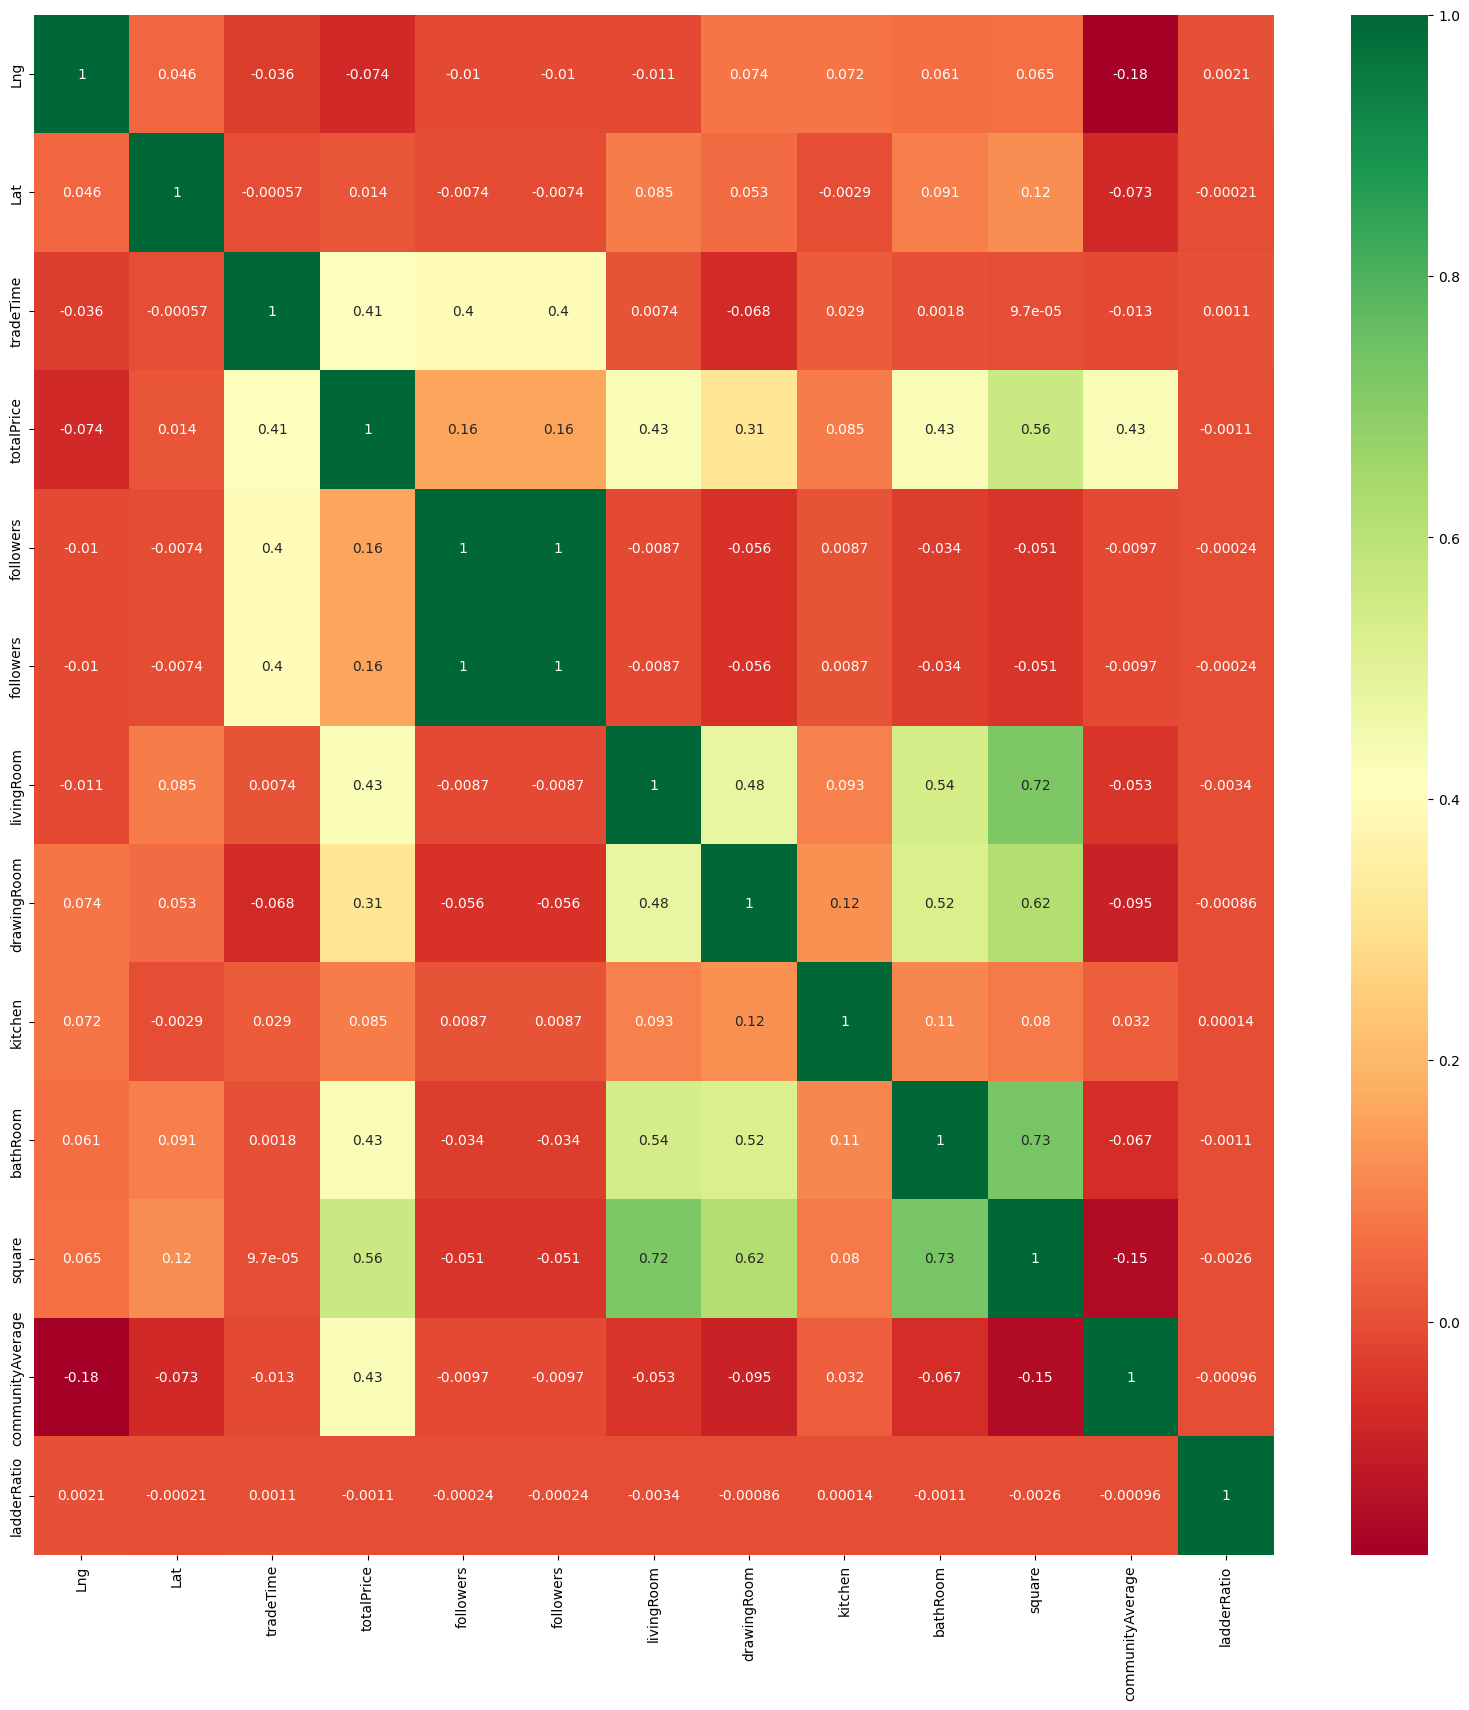

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")
plt.show()

Summary of Heat-Map

i> totalPrice is highly corellated with community average,square,bathroom,livingroom and Trde Time.

ii> totalprice is highly negative corellated with ladderRatio,lat and lng.

Density Plot

<Axes: xlabel='totalPrice', ylabel='Density'>

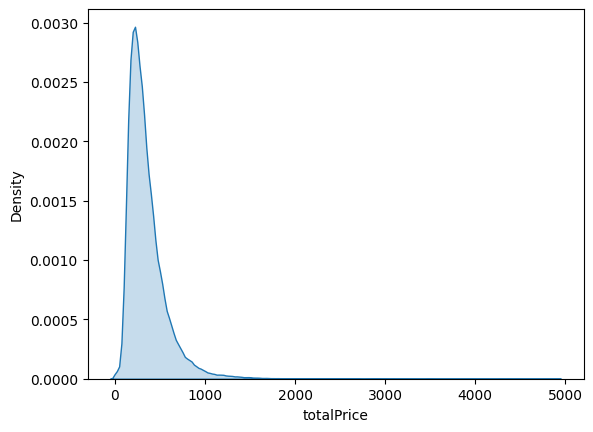

In [ ]:
sns.kdeplot(data=data['totalPrice'],shade=True)

In [ ]:
data['totalPrice'].describe()

,totalPrice
count,297701.000000
mean,349.235387
std,224.523000
min,0.100000
25%,205.000000
50%,295.000000
75%,427.000000
max,4900.000000


In [ ]:
df.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_type,floor_height
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,High,26.0
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,High,22.0
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,Middle,4.0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,Base,21.0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,Middle,6.0


<Axes: xlabel='followers', ylabel='communityAverage'>

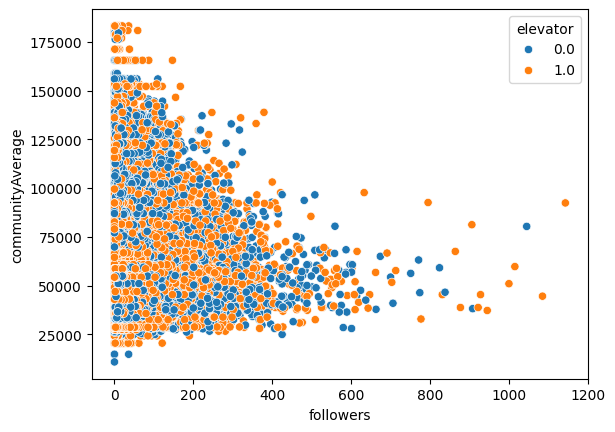

In [ ]:
sns.scatterplot(x=df['followers'],y=df['communityAverage'],hue=df['elevator'])

<Axes: xlabel='totalPrice', ylabel='communityAverage'>

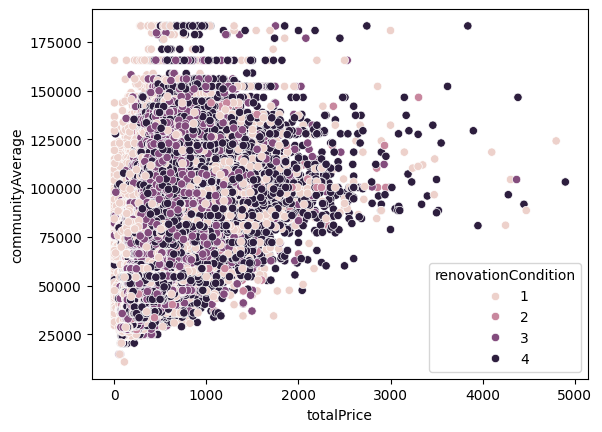

In [ ]:
sns.scatterplot(x=df['totalPrice'],y=df['communityAverage'],hue=df['renovationCondition'])

So,most of the expensive houses have HardCover as a renovation condition

In [ ]:
# sns.swarmplot(x=df['renovationCondition'],
#               y=df['followers'])

<Axes: ylabel='communityAverage'>

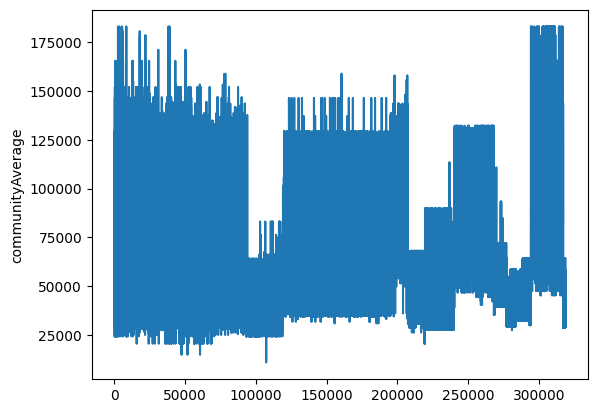

In [ ]:
sns.lineplot(data=df['communityAverage'])

Most of the peoples average are lies in 12500-150000 ...

In [ ]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_High,floor_type_Low,floor_type_Middle,floor_type_Top,floor_type_Unknown
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,2005.0,0.217,0.0,1.0,56021.0,26.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,2004.0,0.667,1.0,0.0,71539.0,22.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,2005.0,0.500,0.0,0.0,48160.0,4.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,2008.0,0.273,0.0,0.0,51238.0,21.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,1960.0,0.333,1.0,1.0,62588.0,6.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
data.shape

(297701, 45)

#### Save the updated data in CSV Format

In [ ]:
data.to_csv("After_EDA.csv")

##Feature Engineering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [ ]:
data=pd.read_csv("After_EDA.csv",index_col=0)
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_High,floor_type_Low,floor_type_Middle,floor_type_Top,floor_type_Unknown
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,2005.0,0.217,0.0,1.0,56021.0,26.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,2004.0,0.667,1.0,0.0,71539.0,22.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,2005.0,0.500,0.0,0.0,48160.0,4.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,2008.0,0.273,0.0,0.0,51238.0,21.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,1960.0,0.333,1.0,1.0,62588.0,6.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Save the dependent variable 'totalPrice' as 'y'
y = data['totalPrice']

# Drop the dependent variable 'totalPrice' from the dataset
data = data.drop(columns=['totalPrice'])

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(data, drop_first=True)

# Select only numeric columns for VIF calculation
numeric_columns = df_encoded.select_dtypes(include=['number']).columns
X = df_encoded[numeric_columns]

# Add constant to the DataFrame for the VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show the VIF results
print(vif_data)

             Variable           VIF
0               const  3.241104e+06
1                 Lng  1.054955e+00
2                 Lat  1.036857e+00
3           tradeTime  1.203986e+00
4           followers  1.197577e+00
5              square  4.551966e+00
6          livingRoom  2.596186e+00
7         drawingRoom  1.687507e+00
8             kitchen  1.032102e+00
9            bathRoom  2.219056e+00
10   constructionTime  1.775464e+00
11        ladderRatio  1.000045e+00
12  fiveYearsProperty  1.068819e+00
13             subway  1.157785e+00
14   communityAverage  1.250209e+00
15       floor_height  1.347331e+00


In [ ]:
import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(X) # adding a constant

model=sm.GLM(y, X,family=sm.families.Gaussian(sm.families.links.identity())).fit()
#model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             totalPrice   No. Observations:               297701
Model:                            GLM   Df Residuals:                   297685
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          11820.
Method:                          IRLS   Log-Likelihood:            -1.8183e+06
Date:                Fri, 28 Mar 2025   Deviance:                   3.5187e+09
Time:                        22:16:16   Pearson chi2:                 3.52e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9618
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.072e+05    358.73

In [ ]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             totalPrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 6.480e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:16:17   Log-Likelihood:            -1.8183e+06
No. Observations:              297701   AIC:                         3.637e+06
Df Residuals:                  297685   BIC:                         3.637e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.072e+05    358.73

In [ ]:
X.drop(columns=['ladderRatio'], inplace=True)

In [ ]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             totalPrice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 6.942e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:16:20   Log-Likelihood:            -1.8183e+06
No. Observations:              297701   AIC:                         3.637e+06
Df Residuals:                  297686   BIC:                         3.637e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.072e+05    358.72

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale the numerical features to standardize them
scaler = StandardScaler()
data_new = data

X_scaled = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.4f}')

# Show some actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error (MSE): 11852.33
Mean Absolute Error (MAE): 72.95
R-squared (R²): 0.7637
        Actual   Predicted
283051    85.0   58.395324
24609    359.0  335.028977
161747   276.0  377.725653
175574   318.0  376.269702
226639   262.0  209.853001


In [ ]:
print("By using Linear Regression we got:")
print("Training data accuracy",model.score(X_train, y_train))
print("Testing data accuracy",model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.7672926808895787
Testing data accuracy 0.763707022880259


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale the numerical features (optional, not always needed for Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=6, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.4f}')

# Show some actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error (MSE): 7892.90
Mean Absolute Error (MAE): 60.87
R-squared (R²): 0.8426
        Actual   Predicted
283051    85.0  217.334929
24609    359.0  300.283888
161747   276.0  305.713397
175574   318.0  305.713397
226639   262.0  190.744857


In [ ]:
print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))

0.8475230574225253
0.8426439027867019


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # Import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale the numerical features (KNN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.4f}')

# Show some actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error (MSE): 7054.67
Mean Absolute Error (MAE): 50.13
R-squared (R²): 0.8594
        Actual  Predicted
283051    85.0     100.60
24609    359.0     292.00
161747   276.0     316.22
175574   318.0     342.40
226639   262.0     211.20


In [ ]:
print(knn_model.score(X_train,y_train))
print(knn_model.score(X_test,y_test))

0.9096570215129615
0.8593552236435527


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')

MSE: 3444.19
MAE: 36.28
R²: 0.9313


In [ ]:
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))

0.9454275178493682
0.9313351997367414
